In [19]:
# nli_analysis.ipynb

import json
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

path = "nli_verification_results_subset.json"
# path = "nli_verification_results.json"

# 1) Load the results JSON
with open(path, "r", encoding="utf-8") as f:
    data = json.load(f)

# data should have:
# {
#   "results": [...],   # each entry: {doc_id, claim_id, claim_text, pred_label, gold_label, ...}
#   "metrics": {...}    # overall metrics (accuracy, macro_precision, etc.)
# }
results = data["results"]
metrics = data["metrics"]

# 2) Convert results to a DataFrame
df = pd.DataFrame(results)
df.head()

,doc_id,claim_id,claim_text,pred_label,gold_label,matched_sentence,p_entail,p_contr,p_neut,NLIScore
0,13734012,2,1 in 5 million in UK have abnormal PrP positiv...,neutral,contradiction,"RESULTS Of the 32,441 appendix samples 16 were...",0.124916,0.098512,0.776573,0.026404
1,13734012,5,1/2000 in UK have abnormal PrP positivity.,neutral,entailment,Genetic testing of the positive specimens for ...,0.004122,0.029463,0.966415,-0.025342
2,13734012,48,"A total of 1,000 people in the UK are asymptom...",neutral,contradiction,SETTING Archived appendix samples from the pat...,0.002306,0.029290,0.968404,-0.026984
3,22080671,15,50% of patients exposed to radiation have acti...,neutral,neutral,These unidentified SMC-derived cells exhibit p...,0.000887,0.006853,0.992260,-0.005966
4,22080671,139,At least 85% of patients exposed to radiation ...,neutral,neutral,On the basis of in vivo KLF4 chromatin immunop...,0.064209,0.094192,0.841600,-0.029983


In [20]:
print("=== Overall Metrics ===")
for metric_name, metric_value in metrics.items():
    print(f"{metric_name}: {metric_value:.3f}")


=== Overall Metrics ===
accuracy: 0.528
macro_precision: 0.489
macro_recall: 0.494
macro_f1: 0.481


In [21]:
gold_counts = Counter(df["gold_label"])
print("Gold label distribution:", gold_counts)

Gold label distribution: Counter({'entailment': 129, 'neutral': 117, 'contradiction': 89})


In [22]:
pred_counts = Counter(df["pred_label"])
print("Predicted label distribution:", pred_counts)


Predicted label distribution: Counter({'entailment': 155, 'neutral': 132, 'contradiction': 48})


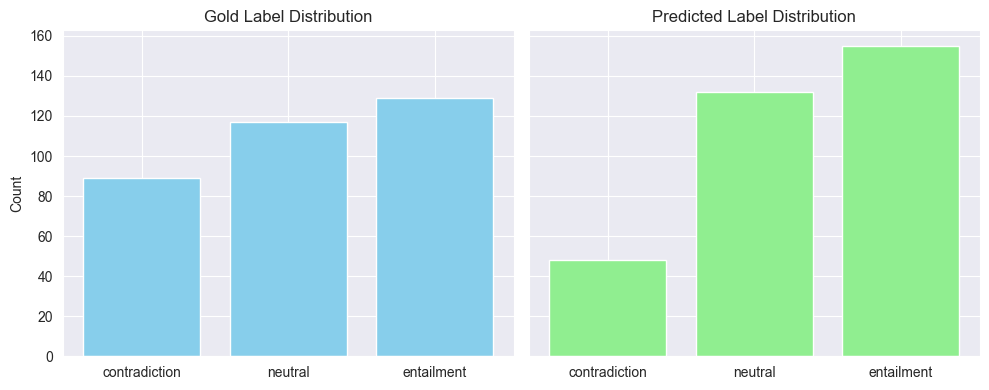

In [23]:
labels = ["contradiction", "neutral", "entailment"]

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axes[0].bar(labels, [gold_counts[l] for l in labels], color="skyblue")
axes[0].set_title("Gold Label Distribution")
axes[0].set_ylabel("Count")

axes[1].bar(labels, [pred_counts[l] for l in labels], color="lightgreen")
axes[1].set_title("Predicted Label Distribution")

plt.tight_layout()
plt.show()


In [24]:
label_map = {"contradiction": 0, "neutral": 1, "entailment": 2}
df["gold_id"] = df["gold_label"].map(label_map)
df["pred_id"] = df["pred_label"].map(label_map)

confusion = pd.crosstab(df["gold_id"], df["pred_id"], rownames=["Gold"], colnames=["Pred"])
confusion


Pred,0,1,2
Gold,,,
0,18,48,23
1,24,60,33
2,6,24,99


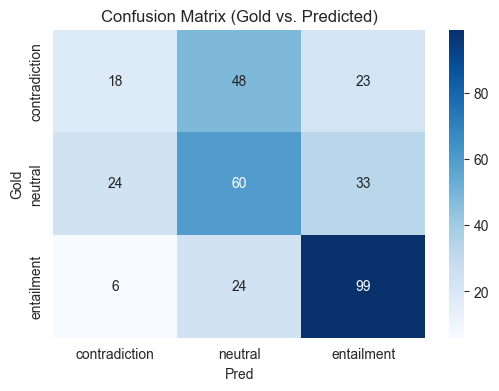

In [25]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d",
            xticklabels=label_map.keys(),
            yticklabels=label_map.keys())
plt.title("Confusion Matrix (Gold vs. Predicted)")
plt.show()

In [26]:
df[["gold_label", "max_entailment_score", "max_contradiction_score", "max_neutral_score"]].describe()

KeyError: "['max_entailment_score', 'max_contradiction_score', 'max_neutral_score'] not in index"

In [ ]:
plt.figure(figsize=(12, 4))
scores_cols = ["max_contradiction_score","max_neutral_score","max_entailment_score"]
df[scores_cols].hist(bins=20, figsize=(12, 4))
plt.suptitle("Distribution of max scores across all claims")
plt.show()
